In [282]:
import kagglehub
import pandas as pd


path = kagglehub.dataset_download(
    "camnugent/predict-nhl-player-salaries/versions/2"
)

df1 = pd.read_csv(path + "/train.csv")
df2 = pd.read_csv(path + "/test.csv")
salary = pd.read_csv(path + "/test_salaries.csv")

df2['Salary'] = salary['Salary'].values
df2 = df2[df1.columns]
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000.0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000.0,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000.0,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000.0,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000.0,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [283]:
df['Born'] = pd.to_datetime(df['Born'], format='%y-%m-%d')
df_clean = df.fillna(0)
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes
df_clean = df_clean.drop("Born", axis=1)

In [284]:
from sklearn.model_selection import train_test_split

TARGET_NAME = "Salary"
X = df_clean.drop(TARGET_NAME, axis=1)
y = df_clean[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [285]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

dt = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
base_mean_error = mean_absolute_error(y_test, np.full(len(y_test), y_train.mean()))

print("--- Decision Forest Regressor ---")
print(f"MAE (в тех же единицах, что и y): {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"Baseline (predict mean): MAE = {base_mean_error:.3f}")


--- Decision Forest Regressor ---
MAE (в тех же единицах, что и y): 973296.880
RMSE: 1478540.721
R2 Score: 0.604
Baseline (predict mean): MAE = 1877717.767


Случайный лес довольно таки мощная модель, поэтому даже при бейзлайне даёт очень хорошие результаты.

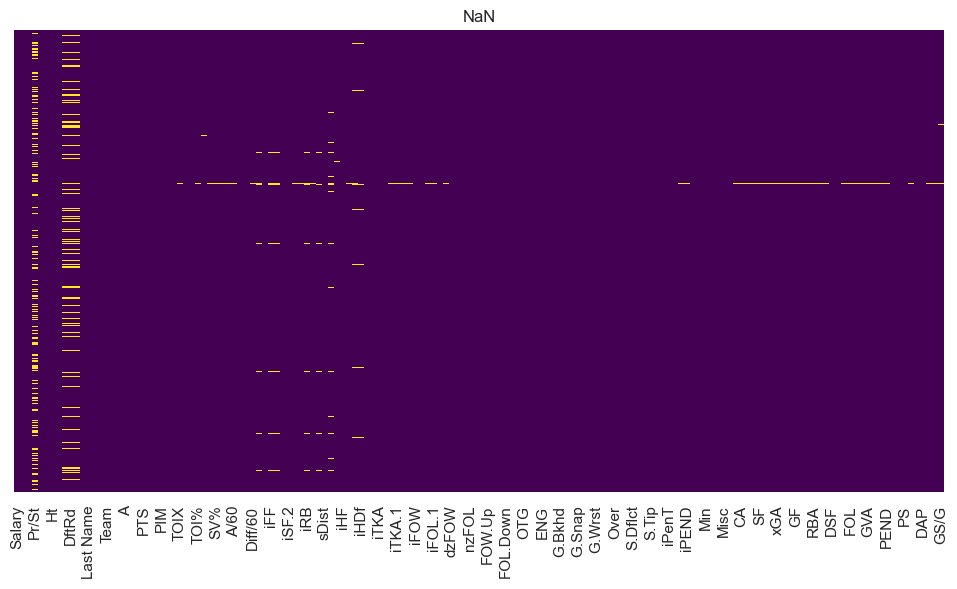

In [286]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from matplotlib import pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download(
    "camnugent/predict-nhl-player-salaries/versions/2"
)

df1 = pd.read_csv(path + "/train.csv")
df2 = pd.read_csv(path + "/test.csv")
salary = pd.read_csv(path + "/test_salaries.csv")
df2['Salary'] = salary['Salary'].values
df2 = df2[df1.columns]
df = pd.concat([df1, df2], ignore_index=True)

nulls = df.isna().sum().sort_values(ascending=False)
null_pct = (nulls / len(df)).mul(100).round(2)

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("NaN")
plt.show()

In [287]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,874.0,2.325289e+06,2.298253e+06,575000.00,742500.00,925000.00,3700000.00,14000000.00
Ht,874.0,7.308238e+01,2.105485e+00,66.00,72.00,73.00,75.00,81.00
Wt,874.0,2.008432e+02,1.506008e+01,157.00,190.00,200.00,210.00,265.00
DftYr,749.0,2.008708e+03,4.380158e+00,1990.00,2006.00,2010.00,2012.00,2016.00
DftRd,749.0,2.742323e+00,1.988358e+00,1.00,1.00,2.00,4.00,9.00
...,...,...,...,...,...,...,...,...
Grit,874.0,1.267815e+02,1.016121e+02,0.00,41.00,114.00,190.00,622.00
DAP,874.0,9.215675e+00,7.815029e+00,0.00,4.60,7.60,12.00,61.00
Pace,873.0,1.089439e+02,8.899877e+00,75.00,104.70,109.20,113.90,175.70
GS,873.0,2.187331e+01,2.198638e+01,-4.30,2.60,15.70,35.40,104.70


In [288]:
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[num_cols].corr()

corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['feature_1', 'feature_2', 'correlation']

corr_pairs = corr_pairs[corr_pairs['feature_1'] < corr_pairs['feature_2']]

corr_pairs = corr_pairs.reindex(
    corr_pairs['correlation'].abs().sort_values(ascending=False).index
)

top40 = corr_pairs.head(40)

display(top40)
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(upper)
to_drop = [col for col in upper_corr.columns if any(upper_corr[col] > 0.998)]

df_clean = df.drop(columns=to_drop)

df_clean.head()

,feature_1,feature_2,correlation
4931,iSF.1,iSF.2,0.999996
8267,iFOL,iFOL.1,0.999981
8122,iFOW,iFOW.1,0.999979
6381,iHF,iHF.1,0.999957
2321,TOI,TOIX,0.999952
7398,iBLK,iBLK.1,0.999948
4787,iSF,iSF.2,0.999937
4786,iSF,iSF.1,0.999931
7108,iGVA,iGVA.1,0.999907
7253,iTKA,iTKA.1,0.999843


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000.0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000.0,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000.0,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000.0,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000.0,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [289]:
df_features = df_clean.copy()

df_features['Born'] = pd.to_datetime(df_features['Born'], format='%y-%m-%d')
reference_date = pd.Timestamp('2016-10-01')
df_features['Age'] = (reference_date - df_features['Born']).dt.days / 365.25

df_features['Experience'] = reference_date.year - df_features['DftYr']
df_features['Age_squared'] = df_features['Age'] ** 2
df_features['G_per_GP'] = df_features['G'] / df_features['GP'].replace(0, 1)
df_features['A_per_GP'] = df_features['A'] / df_features['GP'].replace(0, 1)
df_features['PTS_per_GP'] = df_features['PTS'] / df_features['GP'].replace(0, 1)
df_features['Is_Drafted'] = df_features['DftYr'].notna().astype(int)
df_features['Physical_Impact'] = df_features['Wt'] * df_features['Ht']

features_to_drop = ['Born', 'Last Name', 'First Name', 'Nat', 'Pr/St', 'City']
df_features = df_features.drop(features_to_drop, axis=1)
df_features['Match'].value_counts()

Match
0    870
1      4
Name: count, dtype: int64

In [290]:
has_nan = df_features.isnull().any()

columns_with_nan = has_nan[has_nan].index.tolist()

print("Столбцы, содержащие хотя бы один NaN:")
columns_with_nan

Столбцы, содержащие хотя бы один NaN:


['DftYr',
 'DftRd',
 'Ovrl',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Diff/60',
 'iCF',
 'iFF',
 'iSF',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist.1',
 'Pass',
 'iHA',
 'iHDf',
 'BLK%',
 '%FOT',
 'iPENT',
 'iPEND',
 'CF',
 'CA',
 'xGF',
 'xGA',
 'SCF',
 'SCA',
 'GF',
 'GA',
 'RBF',
 'RBA',
 'RSF',
 'RSA',
 'FOW',
 'FOL',
 'HF',
 'HA',
 'GVA',
 'TKA',
 'PENT',
 'PEND',
 'OTOI',
 'Pace',
 'GS',
 'GS/G',
 'Experience']

In [291]:
TARGET_NAME = 'Salary'

X = df_features.drop(TARGET_NAME, axis=1)
y = df_features[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [292]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

cat_branch = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_cols = X.select_dtypes(include=["int64", "float64"]).columns

num_branch = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

ct = ColumnTransformer(
    transformers=[
        ("cat_proc", cat_branch, cat_cols),
        ("num_proc", num_branch, num_cols),
    ], remainder='drop'
)

In [293]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
import numpy as np

full_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model_wrapper', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

param_grid = {
    'model_wrapper__regressor__n_estimators': [300],
    'model_wrapper__regressor__max_depth': [15, 25, None],
    'model_wrapper__regressor__max_features': ['sqrt', 0.3],
    'model_wrapper__regressor__min_samples_leaf': [2, 4],
}

grid = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)
y_pred_train = grid.best_estimator_.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
train_mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
base_mean_error = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))

print(f"\n--- Decision Tree Regressor ---")
print(f"MAE: {mae:.3f}")
print(f"Train MAE: {train_mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"MAE (predict mean): {base_mean_error:.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'model_wrapper__regressor__max_depth': 25, 'model_wrapper__regressor__max_features': 0.3, 'model_wrapper__regressor__min_samples_leaf': 2, 'model_wrapper__regressor__n_estimators': 300}

--- Decision Tree Regressor ---
MAE: 881933.560
Train MAE: 396361.130
RMSE: 1496382.188
R2 Score: 0.632
MAE (predict mean): 1920315.576


/var/folders/fy/vtftfll11sb6j735rf_vlly80000gn/T/ipykernel_81920/590331643.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')


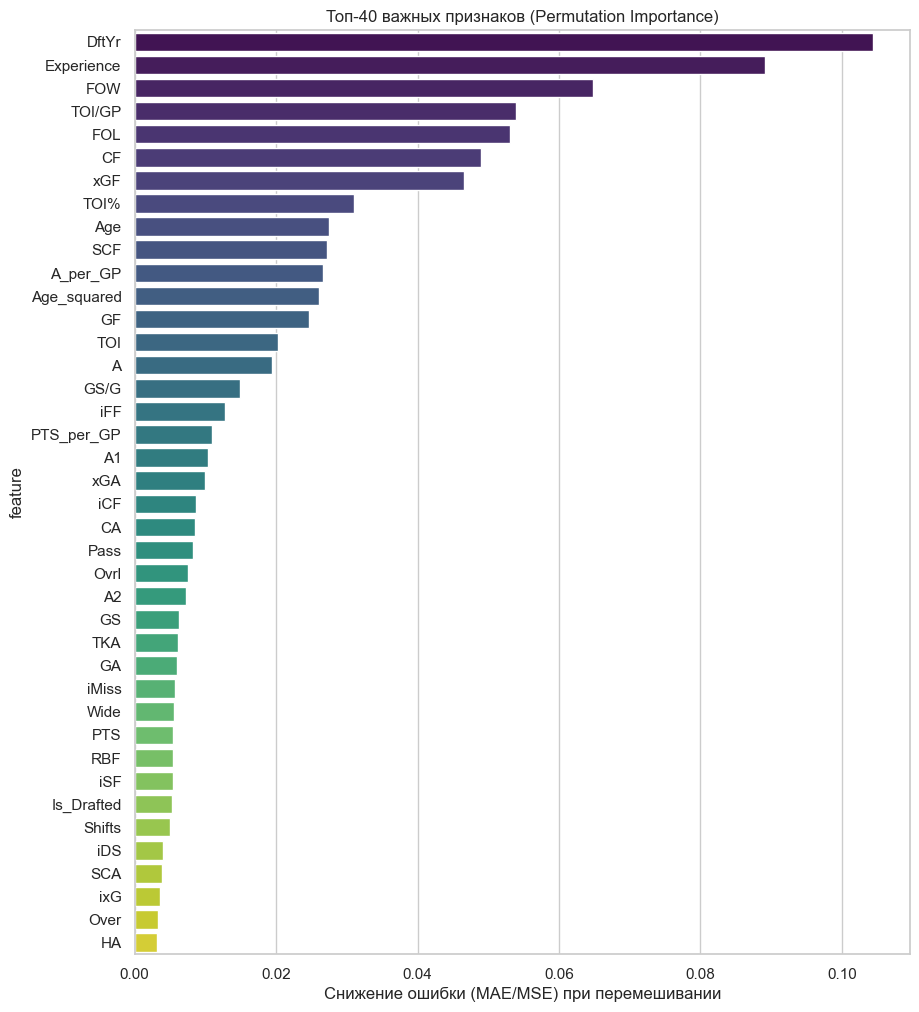

In [294]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(
    grid.best_estimator_,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm_result.importances_mean
})

top_40_perm = perm_df.sort_values(by='importance', ascending=False).head(40)

plt.figure(figsize=(10, 12))
sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')
plt.title("Топ-40 важных признаков (Permutation Importance)")
plt.xlabel("Снижение ошибки (MAE/MSE) при перемешивании")
plt.show()

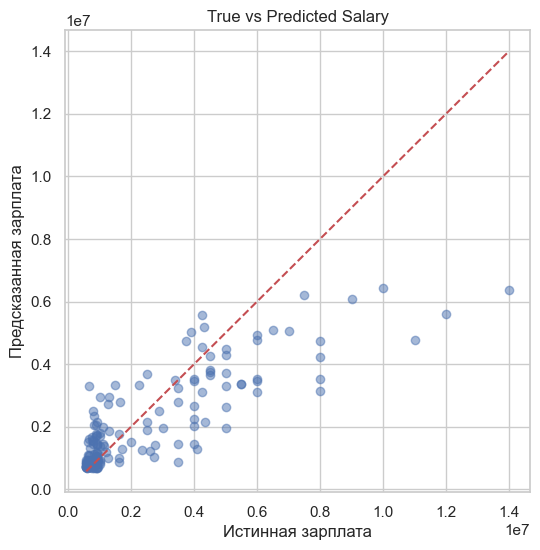

In [295]:
from matplotlib import pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Истинная зарплата")
plt.ylabel("Предсказанная зарплата")
plt.title("True vs Predicted Salary")
plt.grid(True)
plt.show()

Решающее дерево оказывается немного хуже обычной линейной регрессии. Деревьям и лесу тяжело видимо работать с такими данными. Данных немного, поэтому в тестовой выборке он может не увидеть некоторых игроков с большими зарплатами, как следствие, лесу становиться плохо при работе с очень большими зарплатами, он склонен их занижать, в то время как модели линейной регрессии могут лучше обрабатывать такие выбросы.

Стоит отметить, что при меньших зарплатах, лесные модели показывают лучший скор, что видно по графику выше, предсказания явно более кучные относительно главной диагонали.

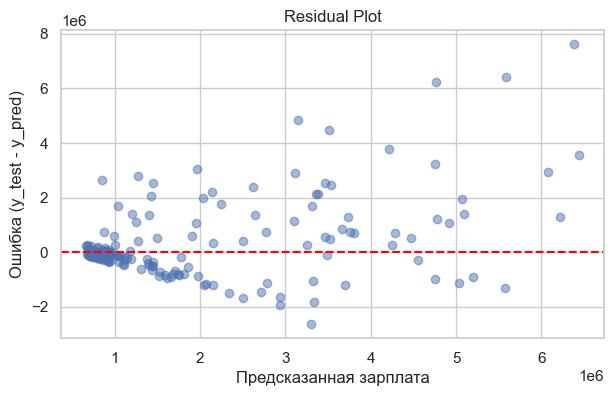

In [296]:
residuals = y_test - y_pred

plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанная зарплата")
plt.ylabel("Ошибка (y_test - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

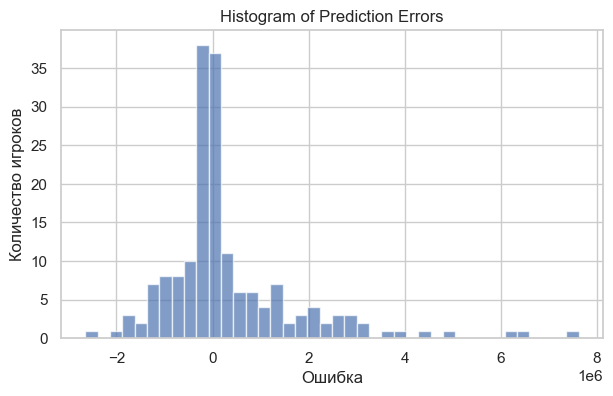

In [297]:
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=40, alpha=0.7)
plt.title("Histogram of Prediction Errors")
plt.xlabel("Ошибка")
plt.ylabel("Количество игроков")
plt.grid(True)
plt.show()

На этой диаграмме явно видно, что лес склонен занижать зарплаты.

Думаю, что бустинг покажет наилучшие результаты. Он сможет найти как нелинейные зависимости, так и не будет склонен к недооценке.

In [298]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils import check_random_state

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class MyDecisionTreeRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.n_features_ = X.shape[1]
        self.root = self._build_tree(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return np.array([self._make_prediction(x, self.root) for x in X])

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (num_samples < self.min_samples_leaf * 2) or \
           (np.var(y) == 0):
            return Node(value=np.mean(y))

        best_split = self._get_best_split(X, y, num_features)

        if best_split["gain"] > 0:
            left_subtree = self._build_tree(best_split["X_left"], best_split["y_left"], depth + 1)
            right_subtree = self._build_tree(best_split["X_right"], best_split["y_right"], depth + 1)
            return Node(
                feature_index=best_split["feature_index"],
                threshold=best_split["threshold"],
                left=left_subtree,
                right=right_subtree
            )
        return Node(value=np.mean(y))

    def _get_best_split(self, X, y, num_features):
        best_split = {"gain": -1, "feature_index": None, "threshold": None}
        max_gain = -float("inf")
        current_uncertainty = np.var(y) * len(y)

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                y_left, y_right = y[left_mask], y[right_mask]

                current_split_uncertainty = (len(y_left) * np.var(y_left)) + (len(y_right) * np.var(y_right))
                gain = current_uncertainty - current_split_uncertainty

                if gain > max_gain:
                    max_gain = gain
                    best_split = {
                        "feature_index": feature_index,
                        "threshold": threshold,
                        "X_left": X[left_mask],
                        "y_left": y_left,
                        "X_right": X[right_mask],
                        "y_right": y_right,
                        "gain": gain
                    }
        return best_split

    def _make_prediction(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._make_prediction(x, node.left)
        else:
            return self._make_prediction(x, node.right)

class MyRandomForestRegressor(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        n_estimators=100,
        max_depth=None,
        min_samples_leaf=1,
        max_features="sqrt",
        bootstrap=True,
        random_state=None
    ):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.trees_ = []
        self.feature_subsets_ = []

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        n_samples, n_features = X.shape

        rng = check_random_state(self.random_state)

        if self.max_features == "sqrt":
            n_sub_features = int(np.sqrt(n_features))
        elif self.max_features == "log2":
            n_sub_features = int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            n_sub_features = self.max_features
        elif self.max_features is None:
            n_sub_features = n_features
        else:
            raise ValueError("Invalid max_features")

        for _ in range(self.n_estimators):
            if self.bootstrap:
                sample_idx = rng.choice(n_samples, n_samples, replace=True)
            else:
                sample_idx = np.arange(n_samples)

            X_sample = X[sample_idx]
            y_sample = y[sample_idx]

            feature_idx = rng.choice(n_features, n_sub_features, replace=False)
            self.feature_subsets_.append(feature_idx)

            X_sample_small = X_sample[:, feature_idx]

            tree = MyDecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X_sample_small, y_sample)

            self.trees_.append(tree)

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)

        predictions = []

        for tree, feat_idx in zip(self.trees_, self.feature_subsets_):
            X_small = X[:, feat_idx]
            predictions.append(tree.predict(X_small))

        return np.mean(predictions, axis=0)


In [299]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
import numpy as np

full_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model_wrapper', TransformedTargetRegressor(
        regressor=MyRandomForestRegressor(),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

param_grid = {
    'model_wrapper__regressor__n_estimators': [300],
    'model_wrapper__regressor__max_depth': [15, 25, None],
    'model_wrapper__regressor__max_features': ['sqrt', 0.3],
    'model_wrapper__regressor__min_samples_leaf': [2, 4],
}

grid = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)
y_pred_train = grid.best_estimator_.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
train_mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
base_mean_error = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))

print(f"\n--- Decision Tree Regressor ---")
print(f"MAE: {mae:.3f}")
print(f"Train MAE: {train_mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"MAE (predict mean): {base_mean_error:.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  Fil

Лучшие параметры: {'model_wrapper__regressor__max_depth': 25, 'model_wrapper__regressor__max_features': 'sqrt', 'model_wrapper__regressor__min_samples_leaf': 2, 'model_wrapper__regressor__n_estimators': 300}

--- Decision Tree Regressor ---
MAE: 1110004.619
Train MAE: 506538.191
RMSE: 1847912.742
R2 Score: 0.438
MAE (predict mean): 1920315.576


Мой лес для регрессии получился сильно хуже, чем у scikit-learn. Это базовая имплементация, которая просто берёт среднее по всем деревьям, а библиотечная реализация использует дополнительно weighted averaging, out-of-bag estimation, subspace sampling, fast impurity reduction

In [300]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
                                  "buntyshah/auto-insurance-claims-data/versions/1",
                                  "insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [301]:
df_clean = df.copy()

TARGET_NAME = "fraud_reported"
df_clean["fraud_reported"] = df_clean["fraud_reported"].map({'Y': 1, 'N': 0})
df_clean["police_report_available"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0}).fillna(-1)
df_clean["property_damage"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0}).fillna(-1)

In [302]:
df_clean = df_clean.drop(columns=["_c39"])

In [303]:
date_cols = ["policy_bind_date", "incident_date"]
for c in date_cols:
    df_clean[c] = pd.to_datetime(df_clean[c], errors="coerce")

In [304]:
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes
df_clean.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,2,1.0,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,...,0,-1.0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,...,2,0.0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,...,1,0.0,6500,1300,650,4550,0,31,2009,0


In [305]:
from sklearn.model_selection import train_test_split
drop_dates = ["policy_bind_date", "incident_date"]
df_clean = df_clean.drop(drop_dates, axis=1)
X = df_clean.drop(TARGET_NAME, axis=1)
y = df_clean[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [306]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = {'F1-score': f1, 'ROC-AUC': roc}

print(f"F1-score (класс 1): {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("="*50)

F1-score (класс 1): 0.4915
ROC-AUC: 0.8370
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       226
           1       0.66      0.39      0.49        74

    accuracy                           0.80       300
   macro avg       0.74      0.66      0.68       300
weighted avg       0.78      0.80      0.78       300



Базовый пайплайн для случайного леса классификатора показывает скор лучше на 0.6 примерно относительно деревьев.

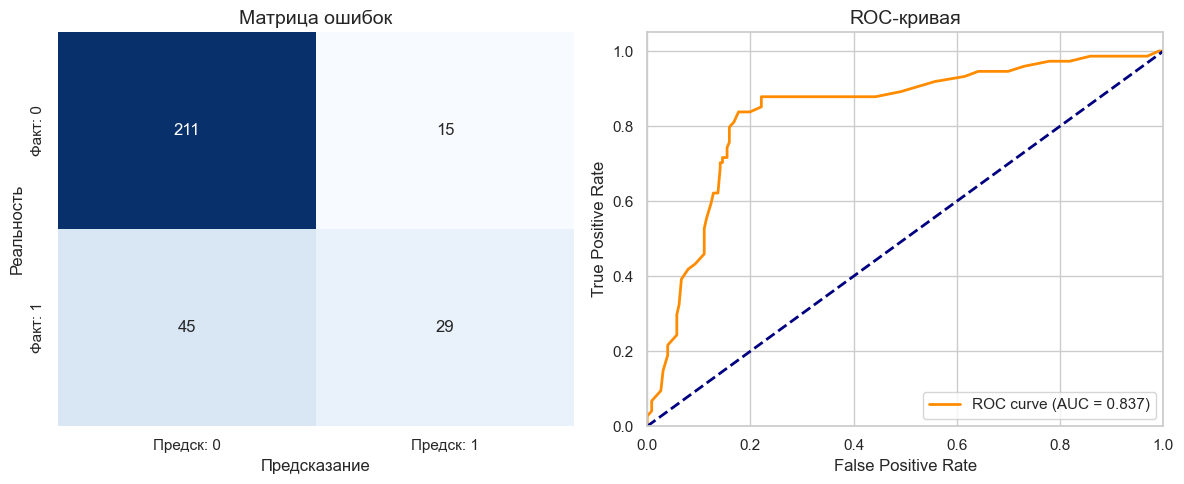

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
def graphics(y_test, y_pred, y_prob):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=['Предск: 0', 'Предск: 1'],
                yticklabels=['Факт: 0', 'Факт: 1'])
    plt.title("Матрица ошибок", fontsize=14)
    plt.ylabel("Реальность")
    plt.xlabel("Предсказание")

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая', fontsize=14)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()
graphics(y_test, y_pred, y_prob)

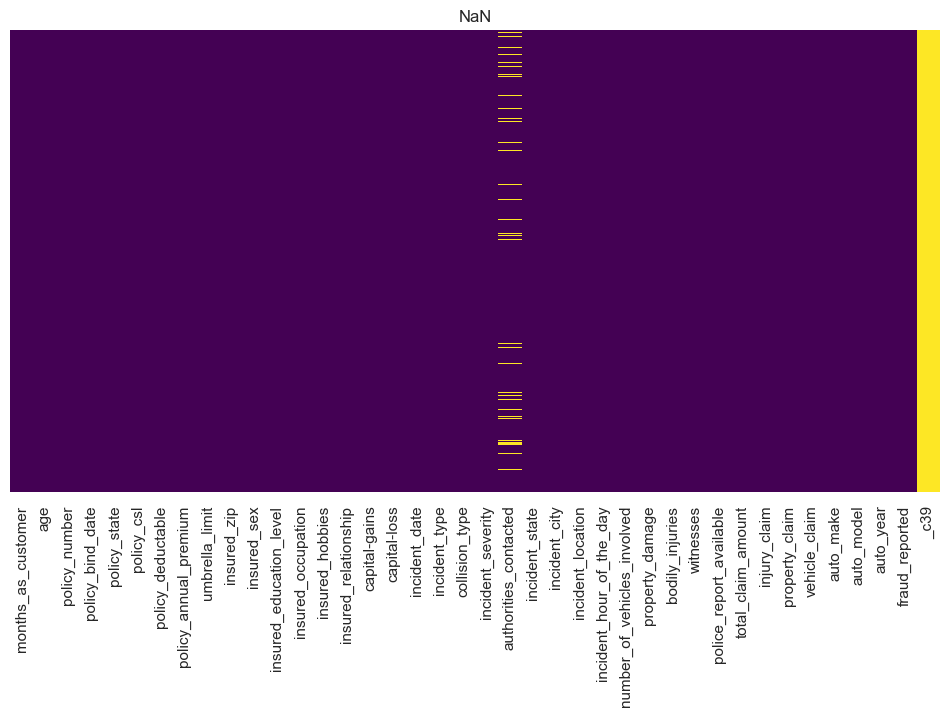

In [308]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
                                  "buntyshah/auto-insurance-claims-data/versions/1",
                                  "insurance_claims.csv")
df.head()

nulls = df.isna().sum().sort_values(ascending=False)
null_pct = (nulls / len(df)).mul(100).round(2)

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("NaN")
plt.show()

In [309]:
df_clean = df.copy()
df_clean["fraud_reported"].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [310]:
display(df_clean["police_report_available"].unique())
display(df_clean["property_damage"].unique())

array(['YES', '?', 'NO'], dtype=object)

array(['YES', '?', 'NO'], dtype=object)

In [311]:
df_clean = df_clean.drop(columns=["_c39"])

df_clean["authorities_contacted"] = df_clean["authorities_contacted"].fillna("No Contact")

TARGET_NAME = "fraud_reported"
df_clean["fraud_reported"] = df_clean["fraud_reported"].map({'Y': 1, 'N': 0})
df_clean["police_report_available"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0, '?': -1})
df_clean["property_damage"] = df_clean["property_damage"].map({'YES': 1, 'NO': 0, '?': -1})

dates_cols = ["policy_bind_date", "incident_date"]
for c in date_cols:
    df_clean[c] = pd.to_datetime(df_clean[c])

df_clean

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,-1,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,-1,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,-1,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,Audi,A5,1998,0


In [312]:
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_clean[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [313]:
import numpy as np

df_pr = df_clean.copy()

median_value = df_pr.loc[df_pr['umbrella_limit'] != -100000, 'umbrella_limit'].median()
df_pr.loc[df_pr['umbrella_limit'] == -100000, 'umbrella_limit'] = median_value

In [314]:
df_features = df_pr.copy()

df_clean["policy_tenure_months"] = ((df_clean["incident_date"] - df_clean["policy_bind_date"]).dt.days / 30).astype(int)

df_features["incident_year"] = df_features["incident_date"].dt.year
df_features["incident_month"] = df_features["incident_date"].dt.month
df_features["incident_dow"] = df_features["incident_date"].dt.dayofweek
df_features["is_weekend"] = df_features["incident_dow"].isin([5, 6]).astype(int)

df_features["injury_ratio"] = df_features["injury_claim"] / (df_features["total_claim_amount"] + 1e-3)
df_features["property_ratio"] = df_features["property_claim"]  / (df_features["total_claim_amount"] + 1e-3)
df_features["vehicle_ratio"] = df_features["vehicle_claim"] / (df_features["total_claim_amount"] + 1e-3)

drop_dates = ["policy_bind_date", "incident_date"]
df_features = df_features.drop(drop_dates, axis=1)

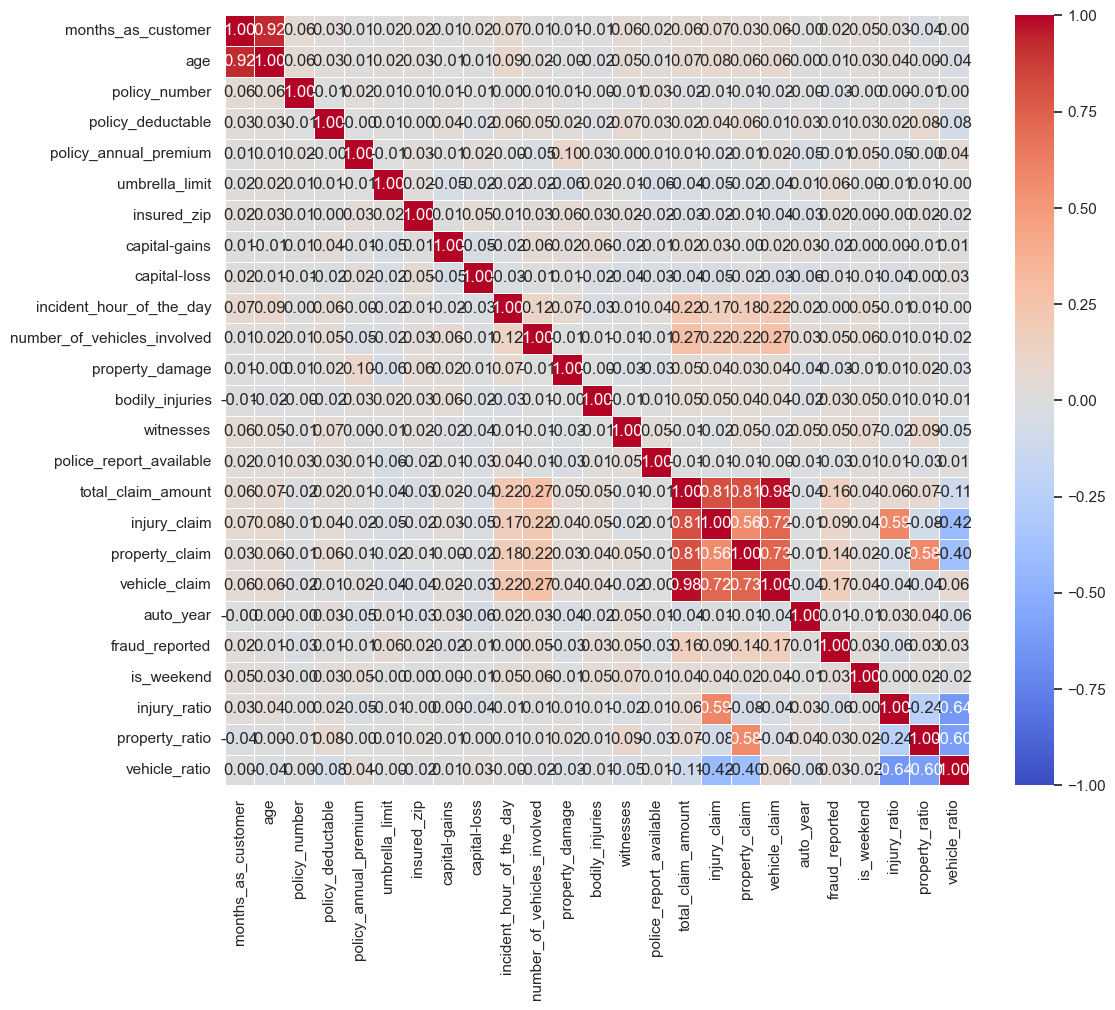

In [315]:
num_cols = df_features.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df_features[num_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.show()

In [316]:
from sklearn.model_selection import train_test_split
X = df_features.drop(TARGET_NAME, axis=1)
y = df_features[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

categorical_pipe = Pipeline([
    ("onehot", OneHotEncoder(
        handle_unknown='infrequent_if_exist',
        sparse_output=False,
        min_frequency=2
    ))
])

ct = ColumnTransformer([
    ("cat", categorical_pipe, cat_cols)
])

model_pipe = Pipeline([
    ('ct', ct),
    ('model', BalancedRandomForestClassifier(random_state=42, n_estimators=500))
])

param_grid = {
    'model__n_estimators': [5, 50, 55],
    'model__max_depth': [10, 15, 20, None],
    'model__max_features': ['sqrt'],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__class_weight': ['balanced'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    model_pipe,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print(f"Лучшие параметры: {grid.best_params_}")

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = {'F1-score': f1, 'ROC-AUC': roc}

print("-" * 30)
print(f"F1-score (класс 1): {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("="*50)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Лучшие параметры: {'model__class_weight': 'balanced', 'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}
------------------------------
F1-score (класс 1): 0.7083
ROC-AUC: 0.8314
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       188
           1       0.62      0.82      0.71        62

    accuracy                           0.83       250
   macro avg       0.78      0.83      0.80       250
weighted avg       0.86      0.83      0.84       250



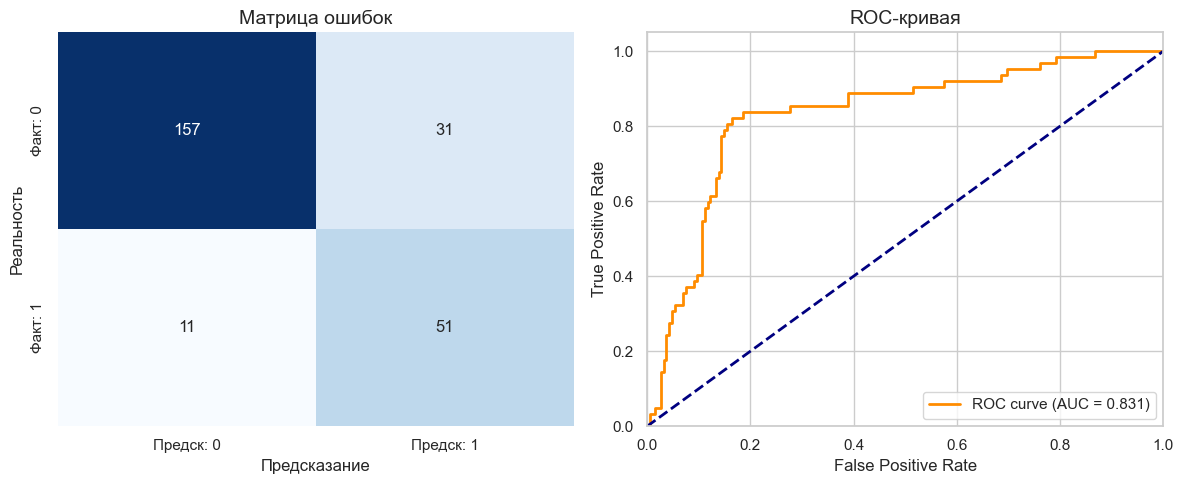

/var/folders/fy/vtftfll11sb6j735rf_vlly80000gn/T/ipykernel_81920/1162972074.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')


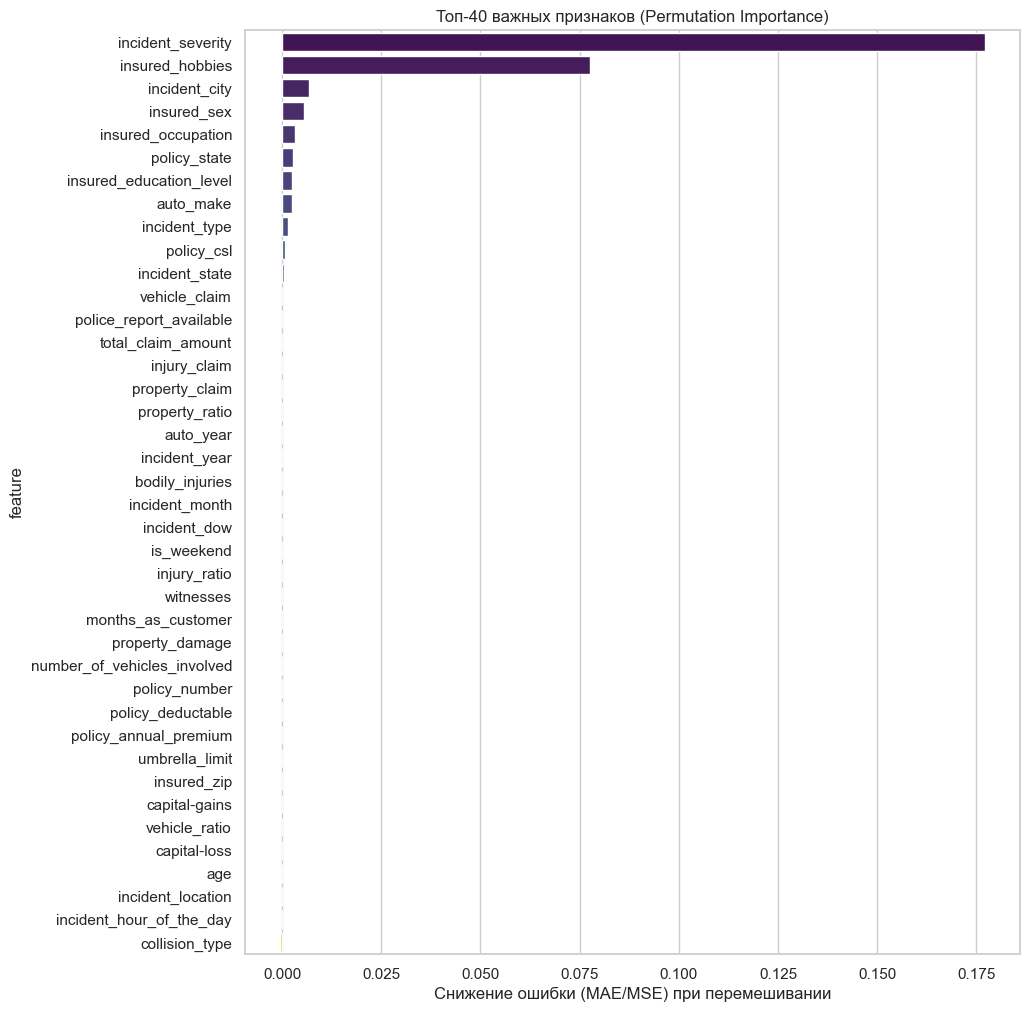

In [318]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
def feature_important(fitted_grid):
    perm_result = permutation_importance(
        fitted_grid.best_estimator_,
        X_test,
        y_test,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    perm_df = pd.DataFrame({
        'feature': X_test.columns,
        'importance': perm_result.importances_mean
    })

    top_40_perm = perm_df.sort_values(by='importance', ascending=False).head(40)

    plt.figure(figsize=(10, 12))
    sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')
    plt.title("Топ-40 важных признаков (Permutation Importance)")
    plt.xlabel("Снижение ошибки (MAE/MSE) при перемешивании")
    plt.show()

graphics(y_test, y_pred, y_prob)
feature_important(grid)

Лесу удалось хуже распознать мошенника. Даже использование балансного леса не помогло, ROC_AUC оказался хуже чем при использовании обычного решающего дерева.

Думаю, что это можно объяснить следующим образом. Как мы раньше видили, на то, является ли человек мошенником или нет влияет не так много факторов. Обучение каждого из деревьев леса происходит на случайной подвыборке, в которую этот сигнал может не попасть, поэтому он будет размыт другими факторами. Одиночное дерево же в свою очередь обучается на всей выборке, поэтому ему в этом плане легче.

In [319]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None,
                 value=None, proba=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.proba = proba

class MyDecisionTreeClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=None, min_samples_leaf=1, min_samples_split=2, criterion='gini'):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.root = None

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.n_classes_ = len(self.classes_)
        self.n_features_ = X.shape[1]

        self.root = self._build_tree(X, y)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return np.array([self._make_prediction(x, self.root) for x in X])

    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)

        probas = []
        for x in X:
            node_probs = self._get_node_proba(x, self.root)
            row_proba = [node_probs.get(c, 0.0) for c in self.classes_]
            probas.append(row_proba)

        return np.array(probas)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        unique_classes = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or \
           (num_samples < self.min_samples_split or num_samples < self.min_samples_leaf * 2) or \
           (unique_classes == 1):
            return self._create_leaf_node(y)

        best_split = self._get_best_split(X, y, num_features)

        if best_split["gain"] > 0:
            left_subtree = self._build_tree(best_split["X_left"], best_split["y_left"], depth + 1)
            right_subtree = self._build_tree(best_split["X_right"], best_split["y_right"], depth + 1)
            return Node(
                feature_index=best_split["feature_index"],
                threshold=best_split["threshold"],
                left=left_subtree,
                right=right_subtree
            )

        return self._create_leaf_node(y)

    def _create_leaf_node(self, y):
        counts = Counter(y)
        most_common = counts.most_common(1)[0][0]
        total = len(y)
        probs = {cls: count / total for cls, count in counts.items()}
        return Node(value=most_common, proba=probs)

    def _get_best_split(self, X, y, num_features):
        best_split = {"gain": -1, "feature_index": None, "threshold": None}
        max_info_gain = -float("inf")
        parent_impurity = self._calculate_impurity(y)

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                y_left, y_right = y[left_mask], y[right_mask]
                n = len(y)
                n_l, n_r = len(y_left), len(y_right)
                child_impurity = (n_l / n) * self._calculate_impurity(y_left) + \
                                 (n_r / n) * self._calculate_impurity(y_right)
                info_gain = parent_impurity - child_impurity

                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_split = {
                        "feature_index": feature_index,
                        "threshold": threshold,
                        "X_left": X[left_mask],
                        "y_left": y_left,
                        "X_right": X[right_mask],
                        "y_right": y_right,
                        "gain": info_gain
                    }
        return best_split

    def _calculate_impurity(self, y):
        if len(y) == 0: return 0
        counts = np.unique(y, return_counts=True)[1]
        probabilities = counts / len(y)
        if self.criterion == 'gini':
            return 1 - np.sum(probabilities ** 2)
        elif self.criterion == 'entropy':
            return -np.sum(probabilities * np.log2(probabilities + 1e-9))
        else:
            raise ValueError("Unknown criterion. Use 'gini' or 'entropy'")

    def _make_prediction(self, x, node):
        if node.value is not None: return node.value
        if x[node.feature_index] <= node.threshold:
            return self._make_prediction(x, node.left)
        return self._make_prediction(x, node.right)

    def _get_node_proba(self, x, node):
        if node.proba is not None: return node.proba
        if x[node.feature_index] <= node.threshold:
            return self._get_node_proba(x, node.left)
        return self._get_node_proba(x, node.right)

class MyRandomForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,
                 n_estimators=100,
                 max_depth=None,
                 min_samples_leaf=1,
                 criterion='gini',
                 max_features="sqrt",
                 bootstrap=True,
                 random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state

        self.trees_ = []
        self.features_per_tree_ = []

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        self.n_classes_ = len(self.classes_)
        self.n_samples_, self.n_features_ = X.shape

        rng = np.random.default_rng(self.random_state)

        if self.max_features == "sqrt":
            self.max_features_ = int(np.sqrt(self.n_features_))
        elif self.max_features == "log2":
            self.max_features_ = int(np.log2(self.n_features_))
        elif isinstance(self.max_features, int):
            self.max_features_ = self.max_features
        elif isinstance(self.max_features, float):
            self.max_features_ = int(self.max_features * self.n_features_)
        else:
            self.max_features_ = self.n_features_

        self.trees_ = []
        self.features_per_tree_ = []

        for _ in range(self.n_estimators):
            if self.bootstrap:
                indices = rng.integers(0, self.n_samples_, size=self.n_samples_)
            else:
                indices = np.arange(self.n_samples_)

            X_sample = X[indices]
            y_sample = y[indices]

            feature_subset = rng.choice(
                self.n_features_,
                size=self.max_features_,
                replace=False
            )
            self.features_per_tree_.append(feature_subset)

            X_sub = X_sample[:, feature_subset]

            tree = MyDecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_leaf=self.min_samples_leaf,
                criterion=self.criterion
            )
            tree.fit(X_sub, y_sample)
            self.trees_.append(tree)

        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)

        probas = np.zeros((len(X), self.n_classes_))

        for tree, features in zip(self.trees_, self.features_per_tree_):
            X_sub = X[:, features]
            probas += tree.predict_proba(X_sub)

        probas /= self.n_estimators
        return probas

    def predict(self, X):
        check_is_fitted(self)
        proba = self.predict_proba(X)
        class_indices = np.argmax(proba, axis=1)
        return self.classes_[class_indices]


In [320]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

categorical_pipe = Pipeline([
    ("onehot", OneHotEncoder(
        handle_unknown='infrequent_if_exist',
        sparse_output=False,
        min_frequency=2
    ))
])

ct = ColumnTransformer([
    ("cat", categorical_pipe, cat_cols)
])

model_pipe = Pipeline([
    ('ct', ct),
    ('model', MyDecisionTreeClassifier())
])

param_grid = {
    'model__max_depth': [10, 15, 20, None],
    'model__min_samples_leaf': [1, 2, 4, 8],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    model_pipe,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print(f"Лучшие параметры: {grid.best_params_}")

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = {'F1-score': f1, 'ROC-AUC': roc}

print("-" * 30)
print(f"F1-score (класс 1): {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("="*50)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zloyaloha/development/ai-frameworks/.venv_ai/lib/python3.14/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lin

Лучшие параметры: {'model__max_depth': 10, 'model__min_samples_leaf': 1}
------------------------------
F1-score (класс 1): 0.5692
ROC-AUC: 0.7727
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       188
           1       0.54      0.60      0.57        62

    accuracy                           0.78       250
   macro avg       0.70      0.72      0.71       250
weighted avg       0.78      0.78      0.78       250



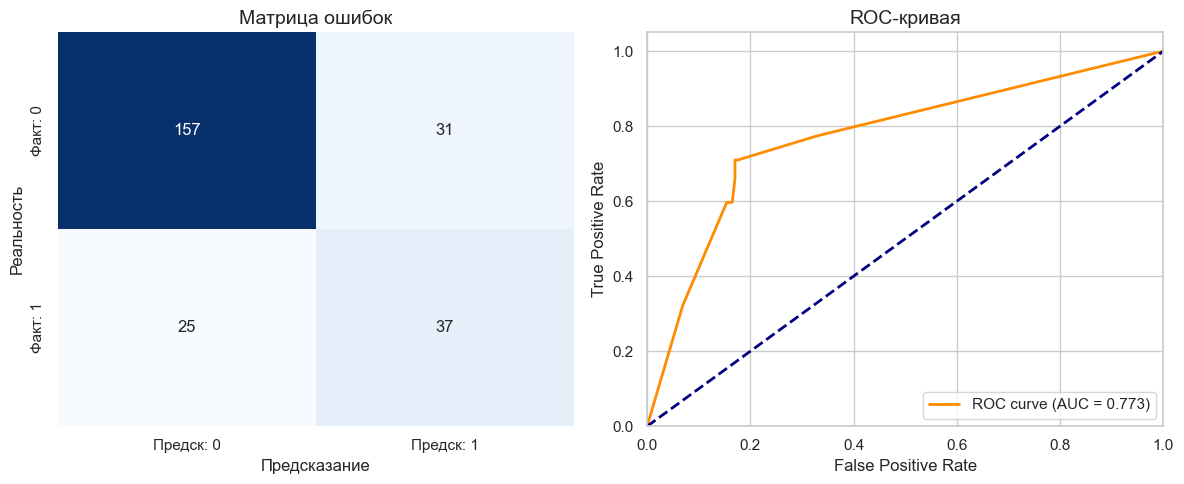

/var/folders/fy/vtftfll11sb6j735rf_vlly80000gn/T/ipykernel_81920/1162972074.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')


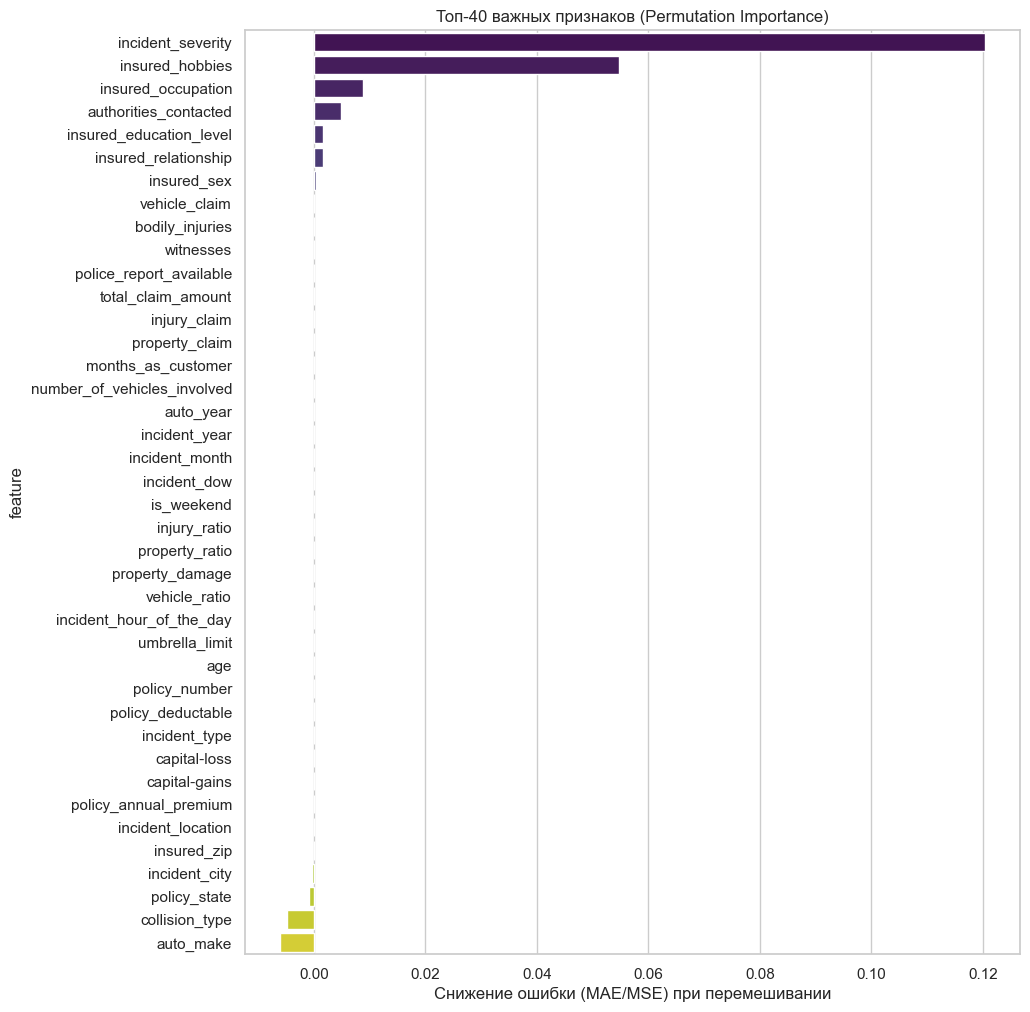

In [321]:
graphics(y_test, y_pred, y_prob)
feature_important(grid)

Собственная реализация работает чуть хуже, поскольку нет поддержки задания min_samples_split и class_weight, последний особенно сильно влияет на результат, поскольку классы в датасете несбалансированны.